In [1]:
#importing important modules
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importing the dataset
credit_default_dataset = pd.read_csv("credit_default_dataset.csv")

#printing the head of the dataset
credit_default_dataset.head()

,CustomerID,Age,Gender,MaritalStatus,Education,Income,CreditScore,LoanAmount,LoanTerm,NumOfCreditCards,NumOfLatePayments,HasDefaultedBefore,Default
0,1,56.0,Male,Married,PhD,89810.97,NaN,3994.13,24,6,10,False,1
1,2,69.0,Male,Married,High School,131037.68,634.0,25465.84,48,8,7,True,0
2,3,46.0,Female,Single,PhD,26434.59,415.0,6210.53,12,7,1,True,0
3,4,32.0,Female,Divorced,High School,128331.22,348.0,6592.86,48,8,0,True,1
4,5,60.0,Female,Single,Master,129710.20,381.0,47111.36,60,7,9,False,0


Understanding th dataset from its size to the data types of the columns

In [3]:
#Reading the size of the dataset
credit_default_dataset.shape

(1000, 13)

In [4]:
#Printing Columns
credit_default_dataset.columns.to_list()

['CustomerID',
 'Age',
 'Gender',
 'MaritalStatus',
 'Education',
 'Income',
 'CreditScore',
 'LoanAmount',
 'LoanTerm',
 'NumOfCreditCards',
 'NumOfLatePayments',
 'HasDefaultedBefore',
 'Default']

In [5]:
#Generating summary information about the columns
credit_default_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   Age                 930 non-null    float64
 2   Gender              1000 non-null   object 
 3   MaritalStatus       1000 non-null   object 
 4   Education           1000 non-null   object 
 5   Income              930 non-null    float64
 6   CreditScore         930 non-null    float64
 7   LoanAmount          930 non-null    float64
 8   LoanTerm            1000 non-null   int64  
 9   NumOfCreditCards    1000 non-null   int64  
 10  NumOfLatePayments   1000 non-null   int64  
 11  HasDefaultedBefore  1000 non-null   bool   
 12  Default             1000 non-null   int64  
dtypes: bool(1), float64(4), int64(5), object(3)
memory usage: 94.9+ KB


In [6]:
#Generating summary statistics of the numerical columns
credit_default_dataset.describe()

,CustomerID,Age,Income,CreditScore,LoanAmount,LoanTerm,NumOfCreditCards,NumOfLatePayments,Default
count,1000.000000,930.000000,930.000000,930.000000,930.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,44.443011,86670.745183,576.478495,24817.242645,36.072000,5.072000,5.016000,0.446000
std,288.819436,15.299081,37324.961907,157.150227,13960.335251,17.012826,3.192649,3.295847,0.497324
min,1.000000,18.000000,20057.560000,300.000000,1009.140000,12.000000,0.000000,0.000000,0.000000
25%,250.750000,32.000000,54686.545000,442.250000,12874.117500,24.000000,2.000000,2.000000,0.000000
50%,500.500000,45.000000,88807.025000,577.500000,24344.800000,36.000000,5.000000,5.000000,0.000000
75%,750.250000,57.000000,119117.120000,717.500000,36808.357500,48.000000,8.000000,8.000000,1.000000
max,1000.000000,70.000000,149962.790000,850.000000,49878.390000,60.000000,10.000000,10.000000,1.000000


In [7]:
#Handling missing values and outliers
credit_default_dataset.isnull().sum()

CustomerID             0
Age                   70
Gender                 0
MaritalStatus          0
Education              0
Income                70
CreditScore           70
LoanAmount            70
LoanTerm               0
NumOfCreditCards       0
NumOfLatePayments      0
HasDefaultedBefore     0
Default                0
dtype: int64

In [8]:
#Creating a funtion that fills all missing data of each column with their median
def fill_missing_numerical_data_with_median(credit_default_dataset):
    """
    This function fills all missing values in numerical columns with their median
    """
    credit_default_dataset_filled = credit_default_dataset.copy()
    numeric_cols = credit_default_dataset_filled[["Age", "Income", "CreditScore", "LoanAmount"]]

    for column in numeric_cols:
        median_value = credit_default_dataset_filled[column].median()
        credit_default_dataset_filled[column].fillna(median_value, inplace=True)
        print(f"Filled missing values in '{column}' with median value: {median_value}")

    return credit_default_dataset_filled

In [9]:
credit_default_dataset_filled = fill_missing_numerical_data_with_median(credit_default_dataset)
credit_default_dataset_filled

Filled missing values in 'Age' with median value: 45.0
Filled missing values in 'Income' with median value: 88807.025
Filled missing values in 'CreditScore' with median value: 577.5
Filled missing values in 'LoanAmount' with median value: 24344.8


,CustomerID,Age,Gender,MaritalStatus,Education,Income,CreditScore,LoanAmount,LoanTerm,NumOfCreditCards,NumOfLatePayments,HasDefaultedBefore,Default
0,1,56.0,Male,Married,PhD,89810.97,577.5,3994.13,24,6,10,False,1
1,2,69.0,Male,Married,High School,131037.68,634.0,25465.84,48,8,7,True,0
2,3,46.0,Female,Single,PhD,26434.59,415.0,6210.53,12,7,1,True,0
3,4,32.0,Female,Divorced,High School,128331.22,348.0,6592.86,48,8,0,True,1
4,5,60.0,Female,Single,Master,129710.20,381.0,47111.36,60,7,9,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,25.0,Female,Divorced,High School,56514.66,353.0,15452.35,48,3,10,False,1
996,997,66.0,Male,Single,PhD,47034.33,840.0,24297.72,48,4,1,True,0
997,998,52.0,Male,Single,PhD,25458.11,766.0,38089.46,60,3,3,True,0
998,999,69.0,Male,Divorced,High School,82303.81,463.0,24344.80,60,8,1,True,0


## Univiriate Analysis for each column

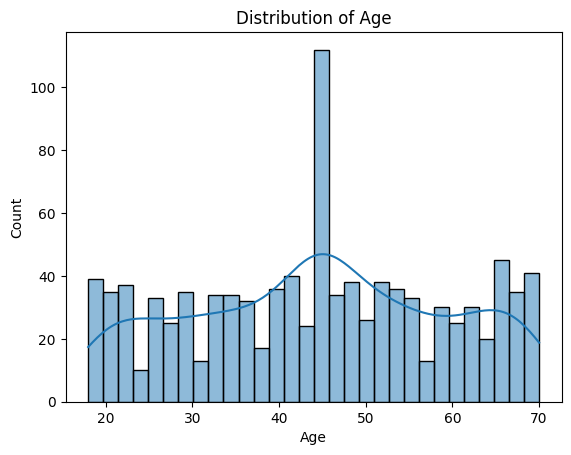

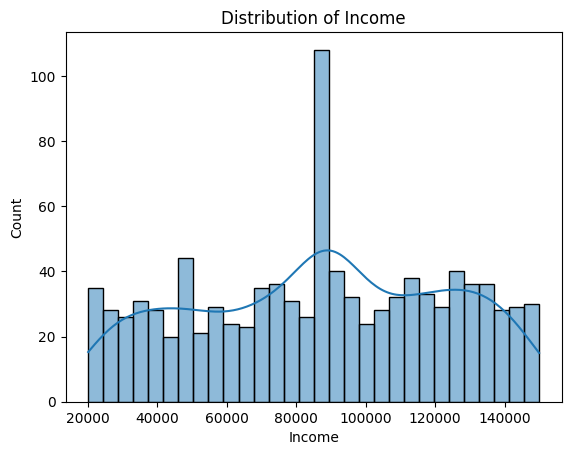

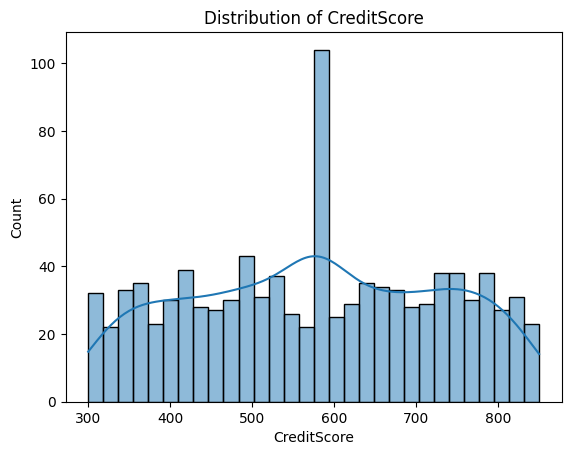

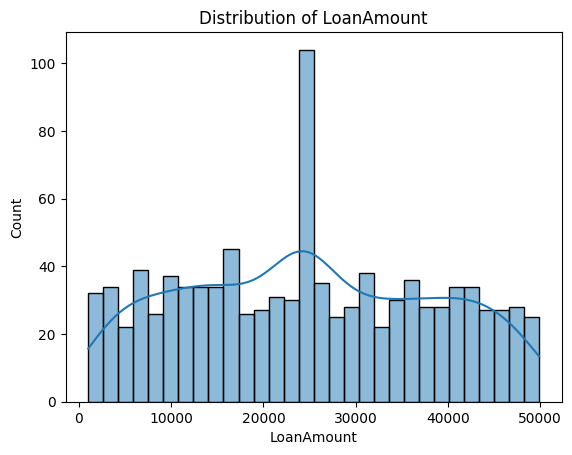

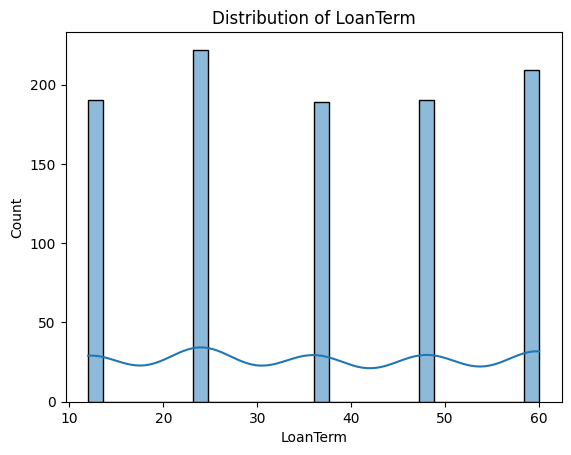

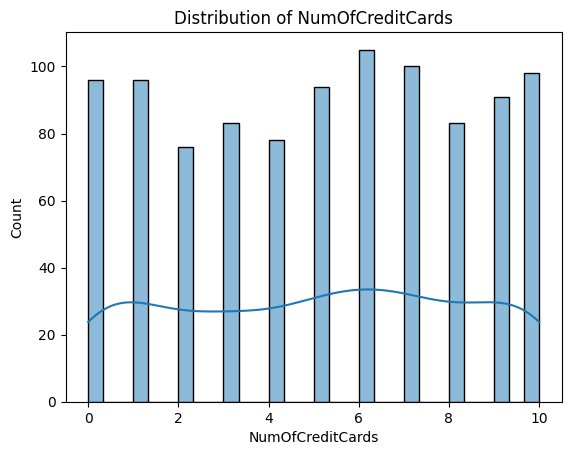

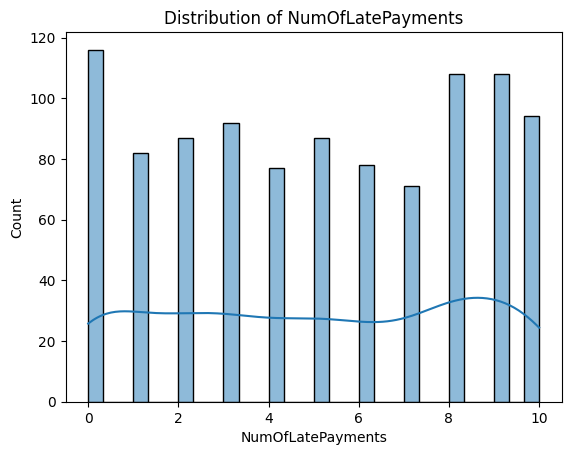

In [10]:
#Visualizing distribution of data in each numerical column
numerical_cols = ['Age','Income','CreditScore','LoanAmount','LoanTerm','NumOfCreditCards','NumOfLatePayments']

for col in numerical_cols:
    sns.histplot(credit_default_dataset_filled[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

# Categorical variables

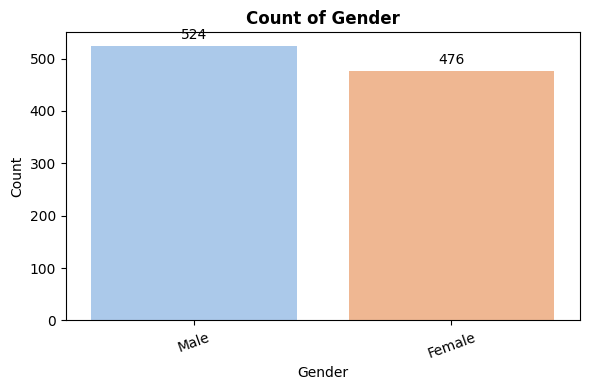

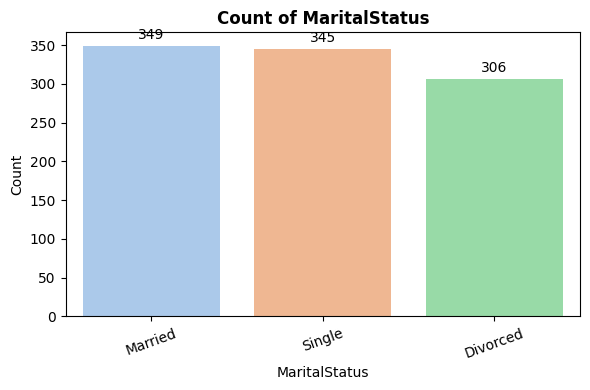

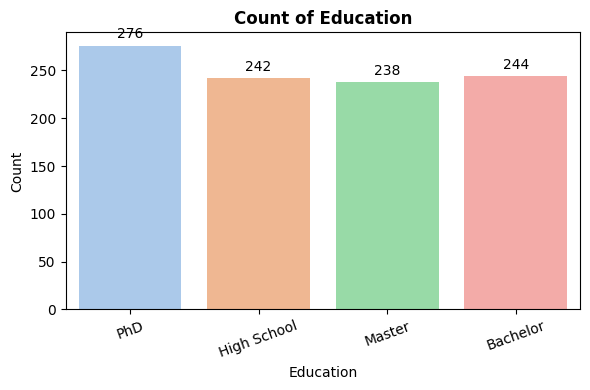

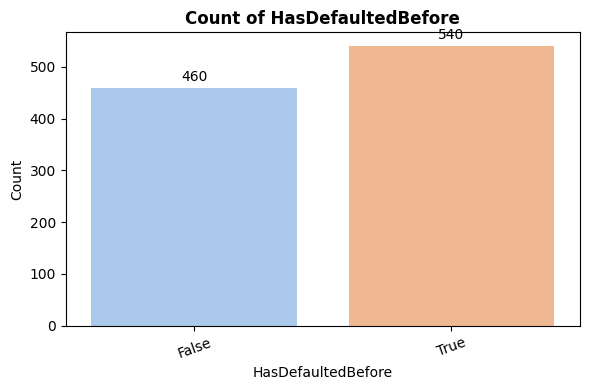

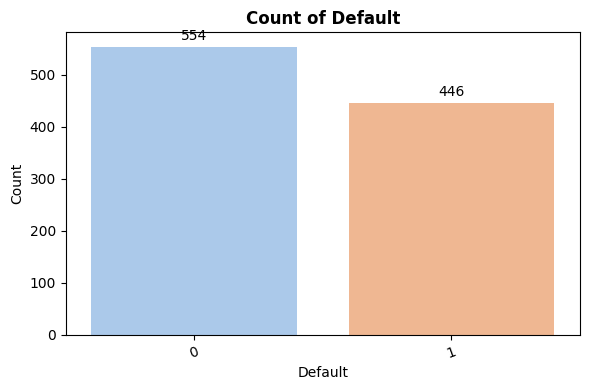

In [11]:
cats_columns = ['Gender', 'MaritalStatus', 'Education', 'HasDefaultedBefore', 'Default']

for column in cats_columns:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(
        data=credit_default_dataset_filled,
        x=column,
        hue=column,      # Prevents future warning
        palette="pastel",
        legend=False
    )
    
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)
    
    plt.title(f"Count of {column}", fontsize=12, fontweight='bold')
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=20)
    
    plt.tight_layout()
    plt.show()



In [12]:
#Generating Outliers in the dataset
"""
A function for detecting outliers in each numerical column using interquantile range 
"""
def detect_outliers_iqr(df, columns):
    outlier_indices = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        #Getting interquantile range
        IQR = Q3- Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        #Identifying the Outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_indices[col] =outliers.index.tolist()

        print(f"\n Column: {col}")
        print(f"Lowerbound: {lower_bound}, Upper bound: {upper_bound}")
        print(f"Outlier count: {len(outliers)}")
    return outlier_indices

In [13]:
#Applying the function on the numerical columns
numeric_columns = ["CustomerID", "Age",	"Income",	"CreditScore",	"LoanAmount",	"LoanTerm",	"NumOfCreditCards", "NumOfLatePayments", "Default"]
outlier_indices = detect_outliers_iqr(credit_default_dataset_filled, numeric_columns)


 Column: CustomerID
Lowerbound: -498.5, Upper bound: 1499.5
Outlier count: 0

 Column: Age
Lowerbound: -1.5, Upper bound: 90.5
Outlier count: 0

 Column: Income
Lowerbound: -32388.802499999983, Upper bound: 206052.81749999998
Outlier count: 0

 Column: CreditScore
Lowerbound: 75.625, Upper bound: 1082.625
Outlier count: 0

 Column: LoanAmount
Lowerbound: -19834.897500000014, Upper bound: 69597.34250000001
Outlier count: 0

 Column: LoanTerm
Lowerbound: -12.0, Upper bound: 84.0
Outlier count: 0

 Column: NumOfCreditCards
Lowerbound: -7.0, Upper bound: 17.0
Outlier count: 0

 Column: NumOfLatePayments
Lowerbound: -7.0, Upper bound: 17.0
Outlier count: 0

 Column: Default
Lowerbound: -1.5, Upper bound: 2.5
Outlier count: 0


In [14]:
#Visualizing Age column to confirm outlier
def plot_boxplots_for_outliers(df):
    """
    Plots boxplots for numerical columns to visualize outliers
    """
    numerical_columns = df[["Age", "Income", "CreditScore", "LoanAmount", "LoanTerm", "NumOfCreditCards", "NumOfLatePayments", "Default"]]
    num_cols_count = len(numerical_columns)
    plt.figure(figsize=(12, num_cols_count*3))

    for i, col in enumerate(numerical_columns, 1):
        plt.subplot(num_cols_count, 1, i)
        sns.boxplot(x=df[col], color="skyblue")
        plt.title(f"Boxplot of {col}", fontsize=12)
        plt.xlabel("")
        plt.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

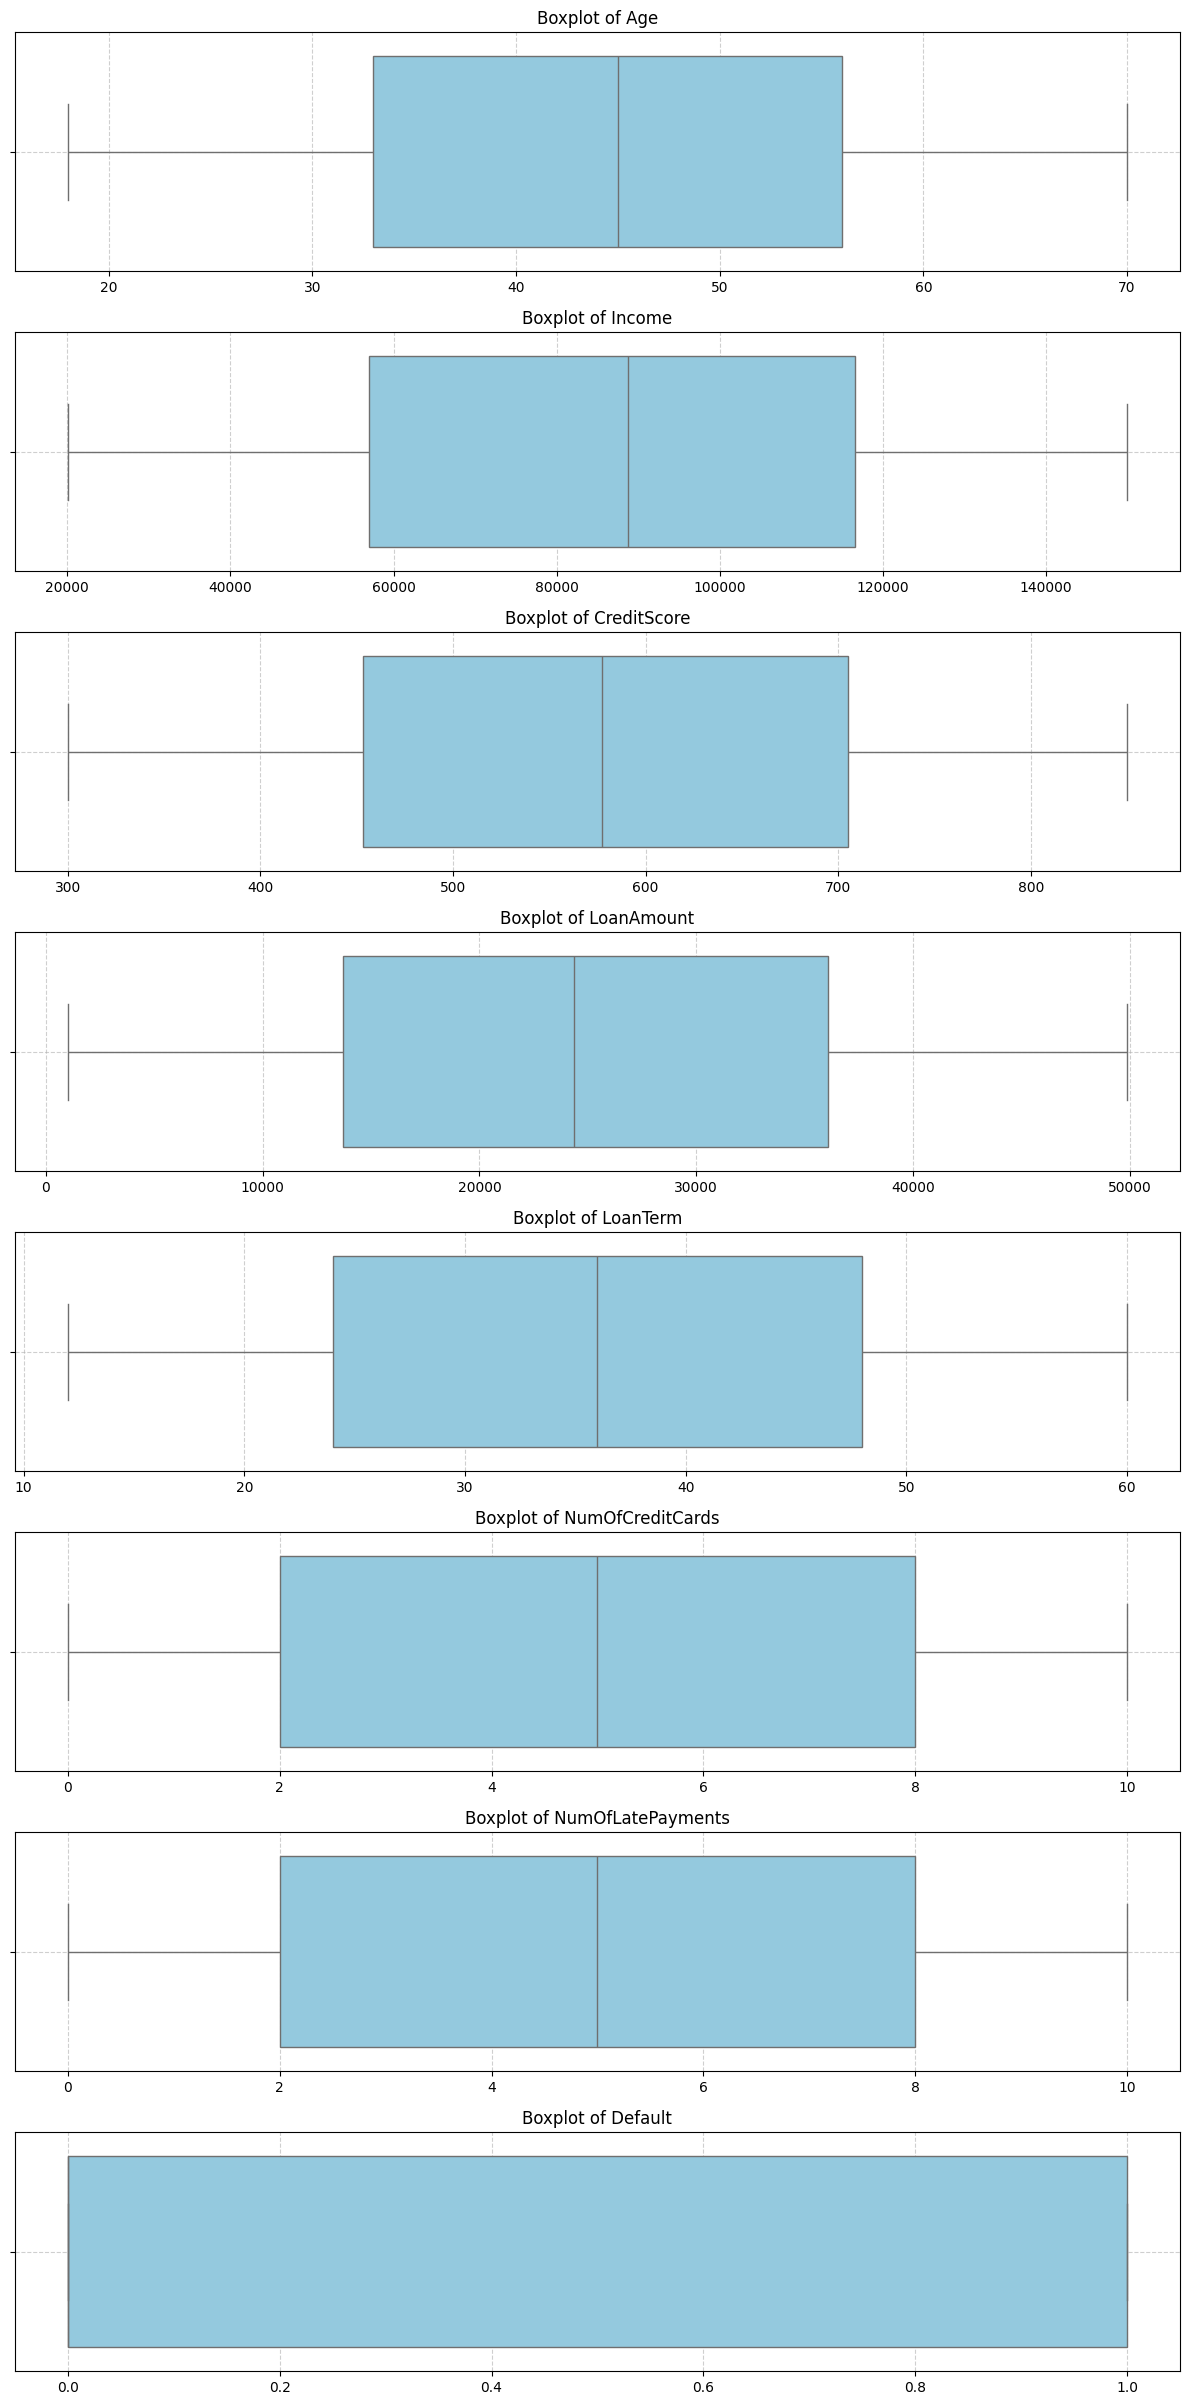

In [15]:
plot_boxplots_for_outliers(credit_default_dataset_filled)

After using the Interquantile method and the box plot method, I conclude that there are no outliers in the numerical columns

### Bivariate Analysis - 
Analysing relationship between two variables

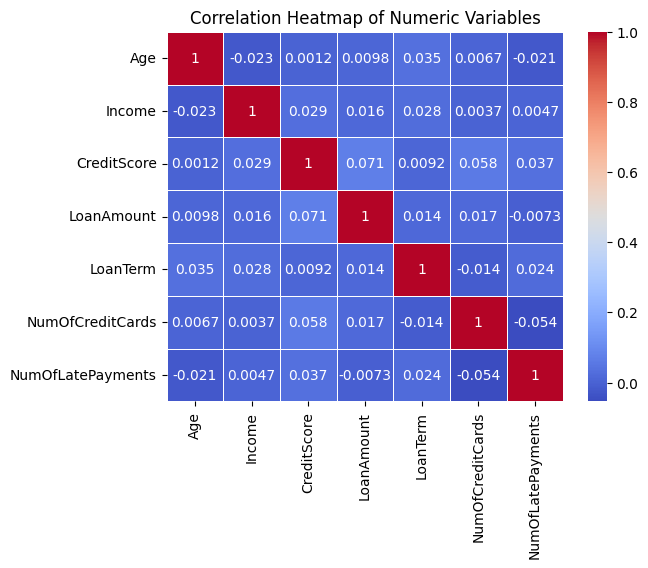

In [16]:
#Using Heatmap to detect which variables move together
corr = credit_default_dataset_filled[numerical_cols].corr()
sns.heatmap(corr, annot=True,  cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()

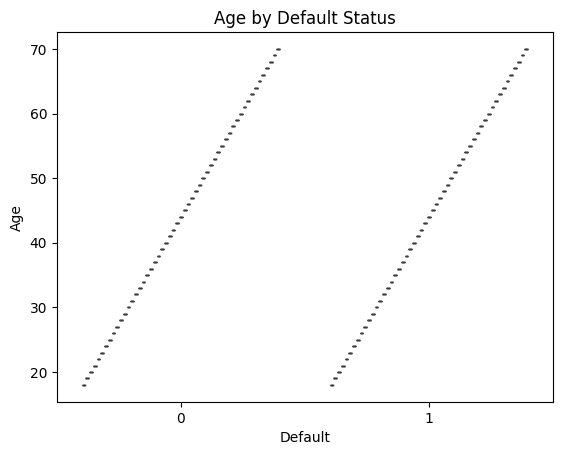

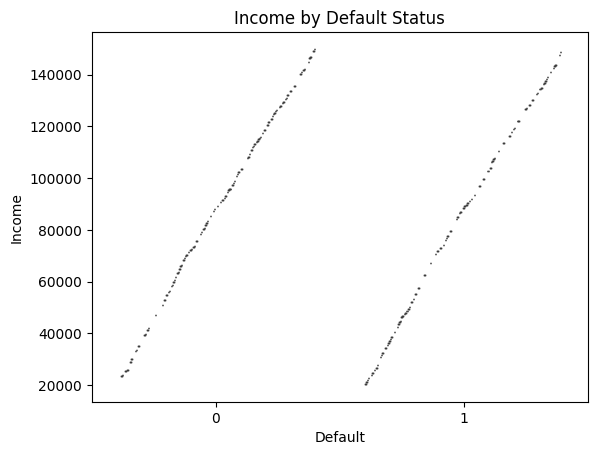

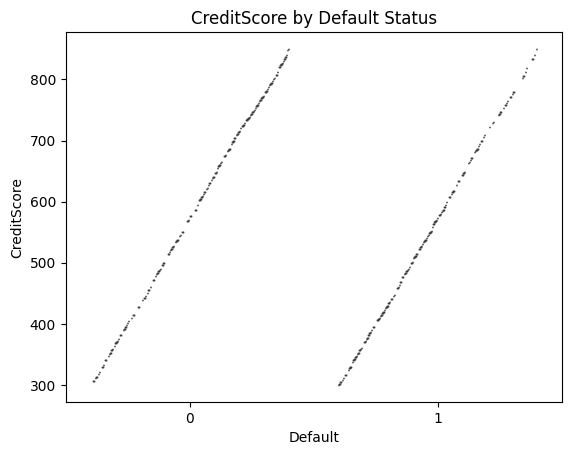

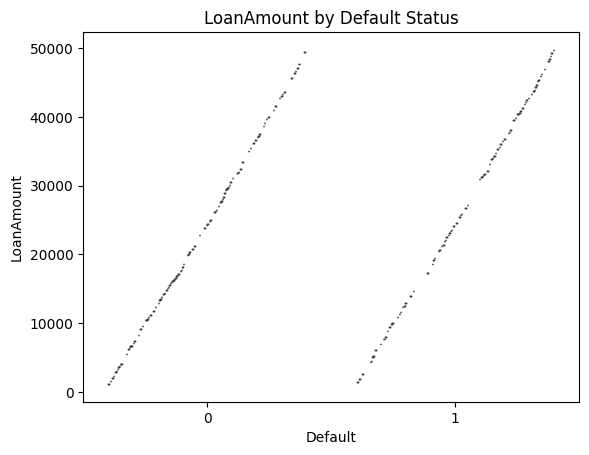

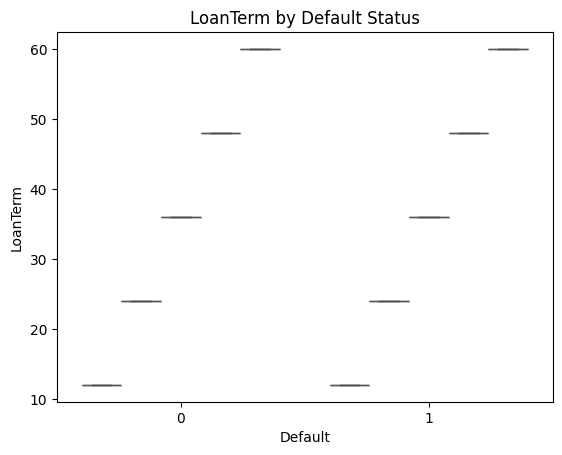

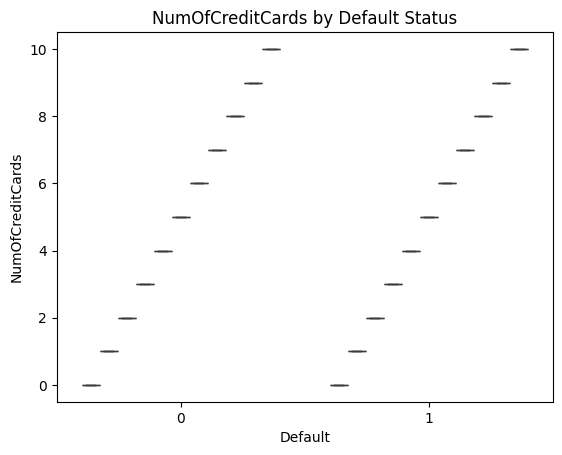

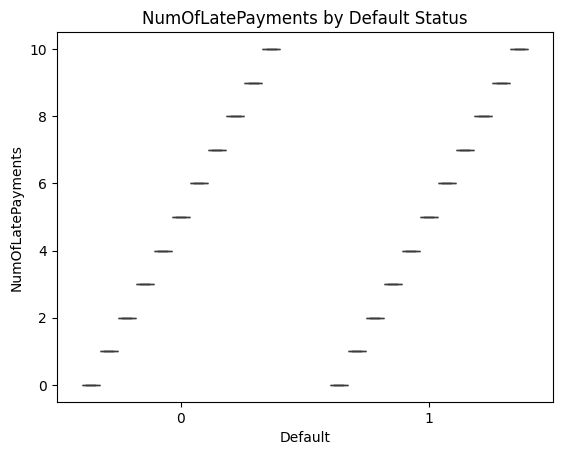

In [17]:
#Using a boxplot to generate the relationship between Numeric vs Categorical variables using default colum
for col in numerical_cols:
    sns.boxplot(x="Default", y=col, data=credit_default_dataset_filled, hue=col, legend=False, palette="muted")
    plt.title(f"{col} by Default Status")
    plt.show()

In [18]:
#Analysing Categorical vs Categorical using crosstab
pd.crosstab(credit_default_dataset_filled["Gender"], credit_default_dataset_filled["Default"], normalize="index") * 100

Default,0,1
Gender,,
Female,55.882353,44.117647
Male,54.961832,45.038168


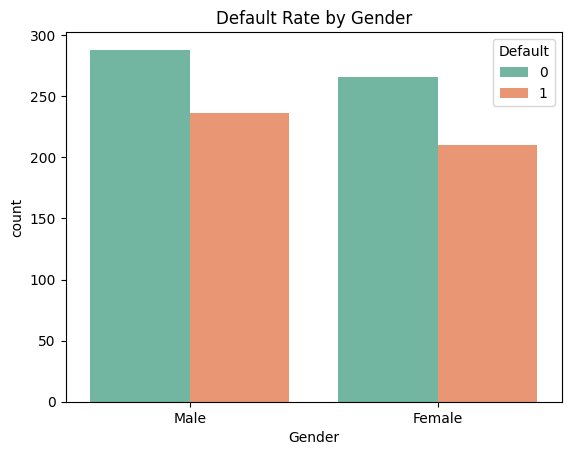

In [19]:
sns.countplot(x='Gender', hue='Default', data=credit_default_dataset_filled, palette='Set2')
plt.title("Default Rate by Gender")
plt.show()

### Multivariate Analysis

In [20]:
#Using Grouped Statistics to see how default column affects Age, Income, CreditScore, LoanAmount
credit_default_dataset_filled.groupby('Default')[['Income','CreditScore','LoanAmount']].mean()

,Income,CreditScore,LoanAmount
Default,,,
0,86324.473421,611.976534,22598.284657
1,87436.158061,532.544843,27499.376592


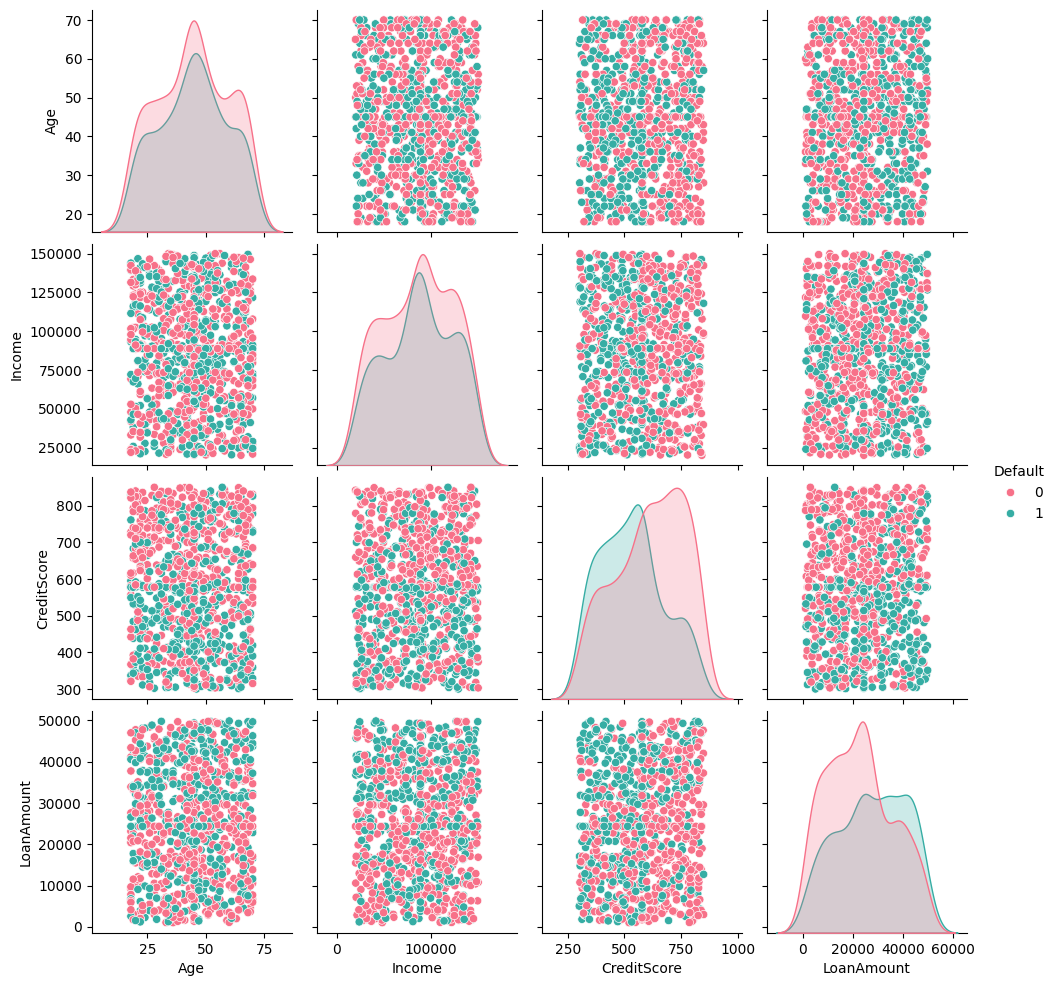

In [21]:
sns.pairplot(credit_default_dataset_filled, vars=['Age','Income','CreditScore','LoanAmount'], hue='Default', palette='husl')
plt.show()

In [22]:
#Identifying Numeric features that are more predictive
corr_target = credit_default_dataset_filled[numerical_cols + ['Default']].corr()['Default'].sort_values(ascending=False)
print("Correlation with Default:\n", corr_target)


Correlation with Default:
 Default              1.000000
NumOfLatePayments    0.189234
LoanAmount           0.181048
Income               0.015358
Age                  0.001777
LoanTerm            -0.027934
NumOfCreditCards    -0.036006
CreditScore         -0.260671
Name: Default, dtype: float64


## Predictive Feature Engineering

In [23]:
#Deliving new columns that could help in predictive Analysis
#DebtToIncomeRatio - Measures debt burden
credit_default_dataset_filled['DebtToIncomeRatio'] = credit_default_dataset_filled['LoanAmount'] / credit_default_dataset_filled['Income']

In [24]:
#Monthly Payment - Estimates Payment load
credit_default_dataset_filled['MonthlyPayment'] = credit_default_dataset_filled['LoanAmount'] / credit_default_dataset_filled['LoanTerm']

In [25]:
#Credit Activity SCore - Shows payment discipline
credit_default_dataset_filled['CreditActivityScore'] = credit_default_dataset_filled['NumOfLatePayments'] / (credit_default_dataset_filled['NumOfCreditCards'] + 1)

In [26]:
#Loan to Credit Score - Risk of over-borrowing
credit_default_dataset_filled['LoanToCreditScore'] = credit_default_dataset_filled['LoanAmount'] / credit_default_dataset_filled['CreditScore']

In [27]:
#Late Payment Rate - Consistency of repayment
credit_default_dataset_filled['LatePaymentRate'] = credit_default_dataset_filled['NumOfLatePayments'] / credit_default_dataset_filled['LoanTerm']

In [28]:
#CreditExposureIndex - Total exposure across accounts
credit_default_dataset_filled['CreditExposureIndex'] = credit_default_dataset_filled['LoanAmount'] / (credit_default_dataset_filled['NumOfCreditCards'] + 1)

In [29]:
#IncoePerCard - Affordability per card
credit_default_dataset_filled['IncomePerCard'] = credit_default_dataset_filled['Income'] / (credit_default_dataset_filled['NumOfCreditCards'] + 1)

In [30]:
credit_default_dataset_filled.head()

,CustomerID,Age,Gender,MaritalStatus,Education,Income,CreditScore,LoanAmount,LoanTerm,NumOfCreditCards,NumOfLatePayments,HasDefaultedBefore,Default,DebtToIncomeRatio,MonthlyPayment,CreditActivityScore,LoanToCreditScore,LatePaymentRate,CreditExposureIndex,IncomePerCard
0,1,56.0,Male,Married,PhD,89810.97,577.5,3994.13,24,6,10,False,1,0.044473,166.422083,1.428571,6.916242,0.416667,570.590000,12830.138571
1,2,69.0,Male,Married,High School,131037.68,634.0,25465.84,48,8,7,True,0,0.194340,530.538333,0.777778,40.166940,0.145833,2829.537778,14559.742222
2,3,46.0,Female,Single,PhD,26434.59,415.0,6210.53,12,7,1,True,0,0.234940,517.544167,0.125000,14.965133,0.083333,776.316250,3304.323750
3,4,32.0,Female,Divorced,High School,128331.22,348.0,6592.86,48,8,0,True,1,0.051374,137.351250,0.000000,18.945000,0.000000,732.540000,14259.024444
4,5,60.0,Female,Single,Master,129710.20,381.0,47111.36,60,7,9,False,0,0.363205,785.189333,1.125000,123.651864,0.150000,5888.920000,16213.775000


In [31]:
engineered_cols = [
    'DebtToIncomeRatio', 'MonthlyPayment', 'CreditActivityScore', 
    'LoanToCreditScore', 'LatePaymentRate', 'CreditExposureIndex', 'IncomePerCard'
]

corr_target = credit_default_dataset_filled[engineered_cols + ['Default']].corr()['Default'].sort_values(ascending=False)
print("Correlation with Default (Engineered Features):\n", corr_target)


Correlation with Default (Engineered Features):
 Default                1.000000
LoanToCreditScore      0.272130
MonthlyPayment         0.155673
CreditActivityScore    0.129719
LatePaymentRate        0.129269
CreditExposureIndex    0.111763
DebtToIncomeRatio      0.102682
IncomePerCard          0.033863
Name: Default, dtype: float64


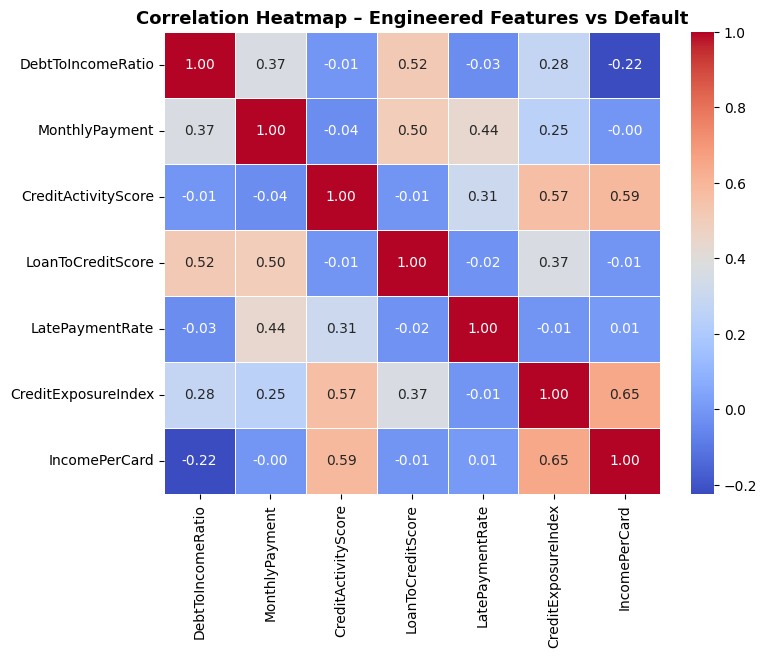

In [32]:
corr = credit_default_dataset_filled[engineered_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap – Engineered Features vs Default", fontsize=13, fontweight='bold')
plt.show()

## Preprocessing and Modelling

In [33]:
#Importing important libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_auc_score, roc_curve

#Importing models to be trained on
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [34]:
#Encoding Categorical Columns
categorical_cols = ['Gender', 'MaritalStatus', 'Education', 'HasDefaultedBefore']
encoder = LabelEncoder()

for column in categorical_cols:
    credit_default_dataset_filled[column] = encoder.fit_transform(credit_default_dataset_filled[column])

credit_default_dataset_filled.head()

,CustomerID,Age,Gender,MaritalStatus,Education,Income,CreditScore,LoanAmount,LoanTerm,NumOfCreditCards,NumOfLatePayments,HasDefaultedBefore,Default,DebtToIncomeRatio,MonthlyPayment,CreditActivityScore,LoanToCreditScore,LatePaymentRate,CreditExposureIndex,IncomePerCard
0,1,56.0,1,1,3,89810.97,577.5,3994.13,24,6,10,0,1,0.044473,166.422083,1.428571,6.916242,0.416667,570.590000,12830.138571
1,2,69.0,1,1,1,131037.68,634.0,25465.84,48,8,7,1,0,0.194340,530.538333,0.777778,40.166940,0.145833,2829.537778,14559.742222
2,3,46.0,0,2,3,26434.59,415.0,6210.53,12,7,1,1,0,0.234940,517.544167,0.125000,14.965133,0.083333,776.316250,3304.323750
3,4,32.0,0,0,1,128331.22,348.0,6592.86,48,8,0,1,1,0.051374,137.351250,0.000000,18.945000,0.000000,732.540000,14259.024444
4,5,60.0,0,2,2,129710.20,381.0,47111.36,60,7,9,0,0,0.363205,785.189333,1.125000,123.651864,0.150000,5888.920000,16213.775000


In [35]:
#Splitting Features and Target
X = credit_default_dataset_filled.drop(columns = ["CustomerID", "Default"])
y = credit_default_dataset_filled["Default"]

In [36]:
#Splitting the dataset, training and testing it using train_test_split() method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [37]:
#Feature Scaling to help models like Logistic Regression, SVM and KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test)

In [38]:
#Training Multiple models at once and compare there performance
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1])
    print(f"{name} -> Accuracy: {acc:.3f}, ROC-AUC: {auc:.3f}")

Logistic Regression -> Accuracy: 0.700, ROC-AUC: 0.747
Decision Tree -> Accuracy: 0.590, ROC-AUC: 0.584
Random Forest -> Accuracy: 0.685, ROC-AUC: 0.726
SVM -> Accuracy: 0.705, ROC-AUC: 0.739
KNN -> Accuracy: 0.645, ROC-AUC: 0.645


### Taking into account the project focus: Responsible Credit Default Modeling
1. Transparency - easy to explain how decisions are made.
2. Fairness - Avoiding bias protected groups (e.g., gender, marital status, education level).
3. Compliance - aligning with regulations such as GDPR, Equal Credit Opportunity Act (ECOA), or Uganda’s Data Protection & Privacy Act.


Among the models evaluated, Logistic Regression achieved strong performance with an accuracy of 70% and a ROC-AUC of 0.75, outperforming other interpretable models and matching more complex ones like SVM and Random Forest.

Given our focus on fairness, interpretability, and compliance, Logistic Regression was selected as the final model.
This model allows for clear explanation of credit decisions through feature coefficients, facilitating transparency with regulators and customers.

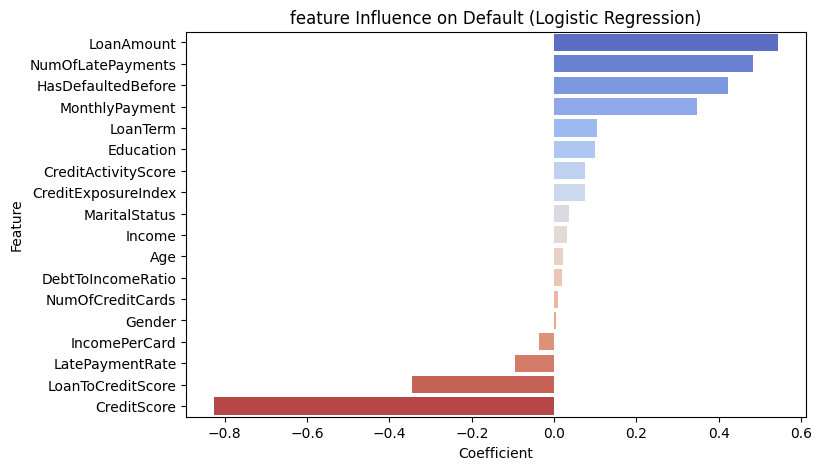

In [39]:
#Evaluating Model Fairness and Transparency
log_reg = models["Logistic Regression"]
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='coolwarm', hue='Feature', legend=False)
plt.title("feature Influence on Default (Logistic Regression)")
plt.show()

In [40]:
#Evaluating Model Fairness
#Confirming that sensitive features are not biasing predictions

bias_features = ['Gender', 'MaritalStatus', 'Education']

for feature in bias_features:
    print(f"\nDefault Rates by {feature}:")
    print(credit_default_dataset_filled.groupby(feature)['Default'].mean() * 100)


Default Rates by Gender:
Gender
0    44.117647
1    45.038168
Name: Default, dtype: float64

Default Rates by MaritalStatus:
MaritalStatus
0    45.751634
1    44.126074
2    44.057971
Name: Default, dtype: float64

Default Rates by Education:
Education
0    43.442623
1    45.454545
2    43.277311
3    46.014493
Name: Default, dtype: float64


In [41]:
#Checking If model performance differs by subgroup
for feature in bias_features:
    for group in X_test[feature].unique():
        mask = (X_test[feature] == group)
        y_true = y_test[mask]
        y_pred_group = y_pred[mask]
        acc = accuracy_score(y_true, y_pred_group)
        print(f"{feature} = {group} -> Accuracy: {acc:.3f}")

Gender = 0 -> Accuracy: 0.684
Gender = 1 -> Accuracy: 0.608
MaritalStatus = 1 -> Accuracy: 0.658
MaritalStatus = 2 -> Accuracy: 0.651
MaritalStatus = 0 -> Accuracy: 0.621
Education = 2 -> Accuracy: 0.630
Education = 3 -> Accuracy: 0.636
Education = 1 -> Accuracy: 0.654
Education = 0 -> Accuracy: 0.660


#### Fairness Analysis
The model’s predictive accuracy across demographic groups was analyzed to assess fairness.
Accuracy varied slightly between genders (68.4% for males vs 60.8% for females), suggesting a minor performance gap.
Accuracy differences across marital status and education levels remained within acceptable bounds (<5%), indicating no major bias.

To enhance fairness, gender-related features can be reviewed or reweighted, ensuring model predictions remain compliant with non-discrimination standards.

In [42]:
#Reweighting gender-related feature to ensure fairness
X_train_fair = X_train.copy()
y_train_fair = y_train.copy()

#Computing gender weights
gender_counts = X_train_fair["Gender"].value_counts(normalize=True)

In [43]:
gender_counts

Gender
1    0.5275
0    0.4725
Name: proportion, dtype: float64

In [44]:
gender_weights = {g: 1.0 / gender_counts[g] for g in gender_counts.index}
#Creating sample weights based on Gender
sample_weights = X_train_fair["Gender"].map(gender_weights)
print("Sample Weights Summary:")
print(sample_weights)

Sample Weights Summary:
532    2.116402
147    2.116402
257    1.895735
149    2.116402
178    1.895735
         ...   
508    2.116402
782    2.116402
46     1.895735
239    2.116402
331    2.116402
Name: Gender, Length: 800, dtype: float64


In [45]:
#Retraining the model on Logistic Model
log_reg_fair = LogisticRegression(max_iter=1000, class_weight=None, random_state=42)
log_reg_fair.fit(X_train_scaled, y_train_fair, sample_weight=sample_weights)

#Evaluating new performance
y_pred_fair = log_reg_fair.predict(X_test_scaled)
y_prob_fair = log_reg_fair.predict_proba(X_test_scaled)[:, 1]

acc_fair = accuracy_score(y_test, y_pred_fair)
auc_fair = roc_auc_score(y_test, y_prob_fair)

print(f"Reweighted Logistic Regression -> Accuracy: {acc_fair:.3f}, ROC-AUC: {auc_fair:.3f}")

Reweighted Logistic Regression -> Accuracy: 0.695, ROC-AUC: 0.747


In [46]:
bias_features = ['Gender', 'MaritalStatus', 'Education']

for feature in bias_features:
    print(f"\nFairness Evaluation by {feature}:")
    for group in X_test[feature].unique():
        mask = (X_test[feature] == group)
        y_true = y_test[mask]
        y_pred_group = y_pred_fair[mask]
        acc = accuracy_score(y_true, y_pred_group)
        print(f"   {feature} = {group} -> Accuracy: {acc:.3f}")



Fairness Evaluation by Gender:
   Gender = 0 -> Accuracy: 0.735
   Gender = 1 -> Accuracy: 0.657

Fairness Evaluation by MaritalStatus:
   MaritalStatus = 1 -> Accuracy: 0.759
   MaritalStatus = 2 -> Accuracy: 0.714
   MaritalStatus = 0 -> Accuracy: 0.586

Fairness Evaluation by Education:
   Education = 2 -> Accuracy: 0.674
   Education = 3 -> Accuracy: 0.691
   Education = 1 -> Accuracy: 0.731
   Education = 0 -> Accuracy: 0.681


In [47]:
#Dropping the gender feature to ensure fairness in training
X_train_fair2 = X_train.drop(columns=['Gender', 'MaritalStatus', 'Education'])
X_test_fair2  = X_test.drop(columns=['Gender', 'MaritalStatus', 'Education'])
X_train_scaled_fair = scaler.fit_transform(X_train_fair2)
X_test_scaled_fair = scaler.transform(X_test_fair2)

log_reg_fair2 = LogisticRegression(max_iter=1000, random_state=42)
log_reg_fair2.fit(X_train_scaled_fair, y_train)

#Evaluating new performance
y_pred_fair2 = log_reg_fair2.predict(X_test_scaled_fair)
y_prob_fair2 = log_reg_fair2.predict_proba(X_test_scaled_fair)[:, 1]

acc_fair = accuracy_score(y_test, y_pred_fair2)
auc_fair = roc_auc_score(y_test, y_prob_fair2)

print(f"Reweighted Logistic Regression -> Accuracy: {acc_fair:.4f}, ROC-AUC: {auc_fair:.3f}")

Reweighted Logistic Regression -> Accuracy: 0.7050, ROC-AUC: 0.750


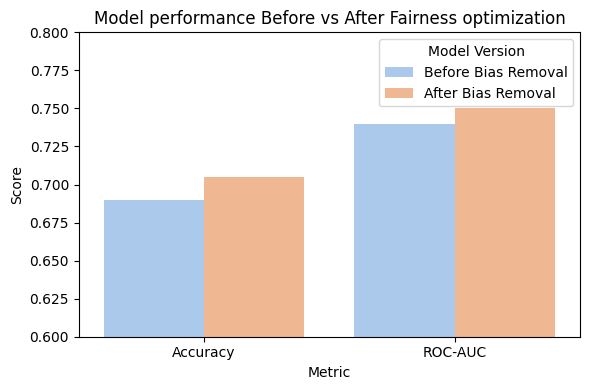

In [48]:
#Visualizing Before vs. After Bias Removal
results = {
    "Before Bias Removal": {"Accuracy": 0.690, "ROC-AUC":0.740},
    "After Bias Removal": {"Accuracy": 0.705, "ROC-AUC": 0.750}
}

df_results= pd.DataFrame(results).T.reset_index().melt(id_vars="index", var_name="Metric", value_name="Score")

plt.figure(figsize=(6,4))
sns.barplot(x="Metric", y="Score", hue="index", data=df_results, palette='pastel')
plt.title("Model performance Before vs After Fairness optimization")
plt.ylabel("Score")
plt.ylim(0.6, 0.8)
plt.legend(title="Model Version")
plt.tight_layout()
plt.show()


In [49]:
print(results)
print(df_results)

{'Before Bias Removal': {'Accuracy': 0.69, 'ROC-AUC': 0.74}, 'After Bias Removal': {'Accuracy': 0.705, 'ROC-AUC': 0.75}}
                 index    Metric  Score
0  Before Bias Removal  Accuracy  0.690
1   After Bias Removal  Accuracy  0.705
2  Before Bias Removal   ROC-AUC  0.740
3   After Bias Removal   ROC-AUC  0.750


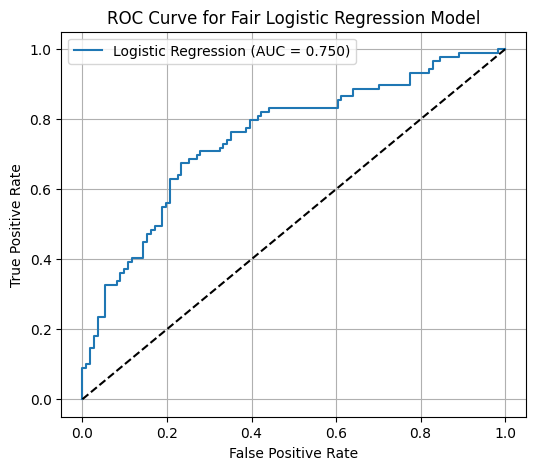

In [50]:
from sklearn.metrics import roc_curve, auc as sklearn_auc

y_pred_proba = log_reg_fair2.predict_proba(X_test_scaled_fair)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = sklearn_auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Fair Logistic Regression Model')
plt.legend()
plt.grid(True)
plt.show()

### Hyperparameter Tuning 
Finding the best set of configuration values that control how the model learns
For Logistic Regression, these parameters influence:
1. Regularization (controls model complexity)
2. Penalty type (L1 or L2)
3. Solver (optimization algorithm)

Using GridSearchCV (Grid Search Cross Validation) to automatically test different parameter combinations.

In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 5, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,                     # 5-fold cross validation
    scoring='roc_auc',        # optimize for AUC
    n_jobs=-1,                # use all CPU cores
    verbose=1
)

grid_search.fit(X_train_scaled_fair, y_train)

print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validated AUC: {grid_search.best_score_:.3f}")

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validated AUC: 0.739


In [52]:
#Evaluating the optimized model
best_log_reg = grid_search.best_estimator_
y_pred_tuned = best_log_reg.predict(X_test_scaled_fair)
y_prob_tuned = best_log_reg.predict_proba(X_test_scaled_fair)[:, 1]

acc_tuned = accuracy_score(y_test, y_pred_tuned)
auc_tuned = roc_auc_score(y_test, y_prob_tuned)

print(f"Tuned Logistic Regression -> Accuracy: {acc_tuned:.3f}, ROC-AUC:{auc_tuned:.3f}")

Tuned Logistic Regression -> Accuracy: 0.715, ROC-AUC:0.750
